In [1]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2020-11-16 11:00:23--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  20.5MB/s    in 1.7s    

2020-11-16 11:00:25 (20.5 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [3]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [4]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [5]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Then a validation set from the train set:

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

Let's KFold over different values of `C`:

In [10]:
C_values = np.arange(0.5,10,0.5)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  
  clf = SVC(C=c)

  model = clf.fit(X_train, y_train)

  # Evaluate on val set
  acc = model.score(X_val, y_val)
  print(f'--> accuracy = {acc}')

  accuracies.append(acc)

Training SVM with C=0.5
--> accuracy = 0.47075208913649025
Training SVM with C=1.0
--> accuracy = 0.5766016713091922
Training SVM with C=1.5
--> accuracy = 0.6100278551532033
Training SVM with C=2.0
--> accuracy = 0.649025069637883
Training SVM with C=2.5
--> accuracy = 0.6768802228412256
Training SVM with C=3.0
--> accuracy = 0.7075208913649025
Training SVM with C=3.5
--> accuracy = 0.724233983286908
Training SVM with C=4.0
--> accuracy = 0.7353760445682451
Training SVM with C=4.5
--> accuracy = 0.7520891364902507
Training SVM with C=5.0
--> accuracy = 0.7632311977715878
Training SVM with C=5.5
--> accuracy = 0.7632311977715878
Training SVM with C=6.0
--> accuracy = 0.7604456824512534
Training SVM with C=6.5
--> accuracy = 0.7604456824512534
Training SVM with C=7.0
--> accuracy = 0.7715877437325905
Training SVM with C=7.5
--> accuracy = 0.7715877437325905
Training SVM with C=8.0
--> accuracy = 0.7715877437325905
Training SVM with C=8.5
--> accuracy = 0.7715877437325905
Training SVM wi

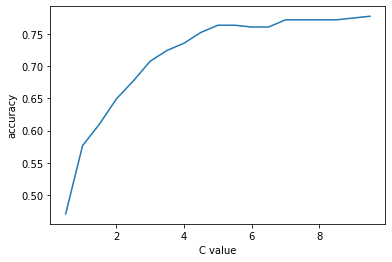

In [13]:
#plot the relation between `c` and the accuracy
import matplotlib.pyplot as plt

plt.plot(C_values, accuracies) 
plt.xlabel('C value')
plt.ylabel('accuracy')  
#plt.hist(tabNb)
plt.show()

In [17]:
#Fit on the whole train set, evaluate on the test set 

clf = SVC(C=10)
model = clf.fit(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(f'--> accuracy test = {accuracy_test}')

--> accuracy test = 0.6956521739130435
